In [2]:
#Importing Libraries and tools required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [3]:
df = pd.read_csv("Downloads/Insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
df.shape

(1338, 7)

In [6]:
count_per_category = df[df['sex'] == 'male'].groupby('sex').size()
print(count_per_category)

sex
male    676
dtype: int64


In [7]:
df['region'].value_counts().sort_values()

northeast    324
southwest    325
northwest    325
southeast    364
Name: region, dtype: int64

In [8]:
df['smoker'].value_counts().sort_values()

yes     274
no     1064
Name: smoker, dtype: int64

In [9]:
df['children'].value_counts().sort_values()

5     18
4     25
3    157
2    240
1    324
0    574
Name: children, dtype: int64

In [10]:
#Used OneHotEncoder but as there is many categorical features to be converted to binary it will become more features and complex
#So moving with below approach

encoder = OneHotEncoder()
encoder.fit(df[['sex']])
encoded_data = encoder.transform(df[['sex']])
encoded_array = encoded_data.toarray()
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['sex']))
final_df = pd.concat([df, encoded_df], axis=1)

In [11]:
transform_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
data_copy = df.copy()
data_copy.replace(transform_data, inplace=True)

In [12]:
data_copy.describe()

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.665471,1.094918,0.204783,1.514948,13270.422414
std,14.049960,0.500160,6.098382,1.205493,0.403694,1.105572,12110.011240
min,18.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1121.870000
25%,27.000000,0.000000,26.300000,0.000000,0.000000,1.000000,4740.287500
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.030000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16639.915000
max,64.000000,1.000000,53.100000,5.000000,1.000000,3.000000,63770.430000


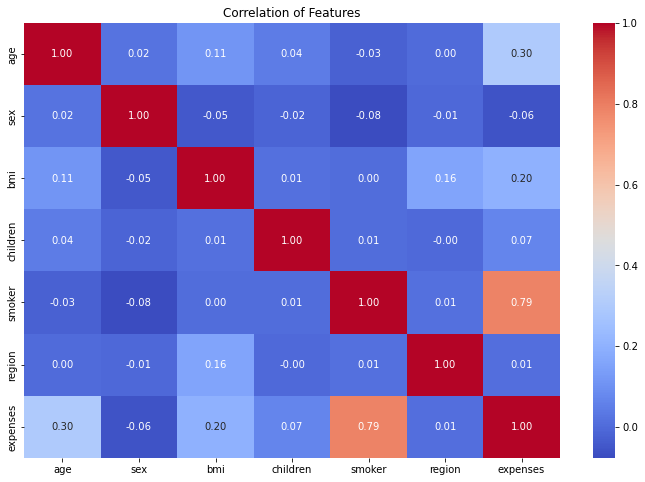

In [13]:
corr = data_copy.corr()
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr,cmap='coolwarm',annot=True,fmt=".2f",ax=ax)
plt.title("Correlation of Features")
plt.show()

In the Viz. we can see that expenses is most correlated with smoker and age and BMI plays an Important role

<AxesSubplot:title={'center':'Age vs expenses'}, xlabel='age', ylabel='expenses'>

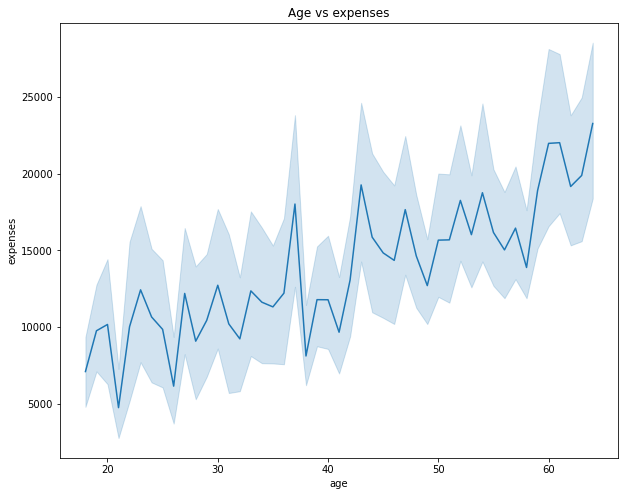

In [14]:
plt.figure(figsize=(10,8))
plt.title('Age vs expenses')
sns.lineplot(x='age',y='expenses',data=data_copy,palette='magma')

<AxesSubplot:title={'center':'Region vs Expenses'}, xlabel='region', ylabel='expenses'>

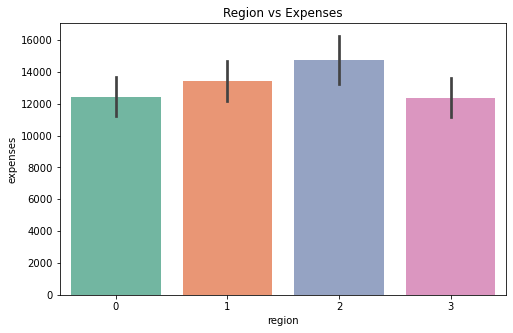

In [15]:
plt.figure(figsize=(8,5))
plt.title('Region vs Expenses')
sns.barplot(x='region',y='expenses',data=data_copy,palette='Set2')

<AxesSubplot:title={'center':'Smoker vs Expenses'}, xlabel='smoker', ylabel='expenses'>

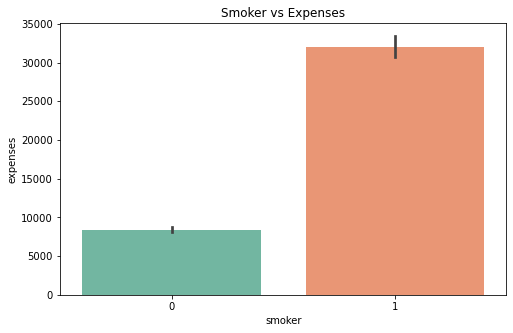

In [16]:
plt.figure(figsize=(8,5))
plt.title('Smoker vs Expenses')
sns.barplot(x='smoker',y='expenses',data=data_copy,palette='Set2')

<AxesSubplot:title={'center':'BMI vs Expenses'}, xlabel='bmi', ylabel='expenses'>

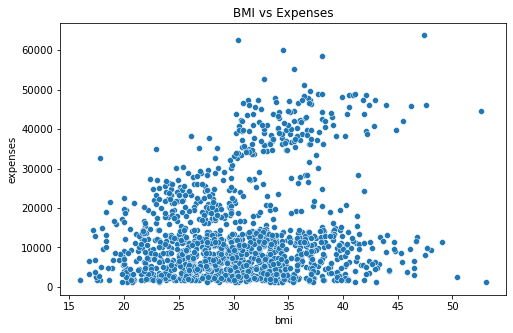

In [17]:
plt.figure(figsize=(8,5))
plt.title('BMI vs Expenses')
sns.scatterplot(x='bmi',y='expenses',data=data_copy,palette='red')

In [18]:
print("Skewness and Kurtosis for all feature: ")
print("----------------------------------------")
for col in list(data_copy.columns):
    print('{0} : Skewness {1:.3f} and  Kurtosis {2:.3f}'.format(col,data_copy[col].skew(),data_copy[col].kurt()))

Skewness and Kurtosis for all feature: 
----------------------------------------
age : Skewness 0.056 and  Kurtosis -1.245
sex : Skewness 0.021 and  Kurtosis -2.003
bmi : Skewness 0.285 and  Kurtosis -0.053
children : Skewness 0.938 and  Kurtosis 0.202
smoker : Skewness 1.465 and  Kurtosis 0.146
region : Skewness -0.038 and  Kurtosis -1.329
expenses : Skewness 1.516 and  Kurtosis 1.606


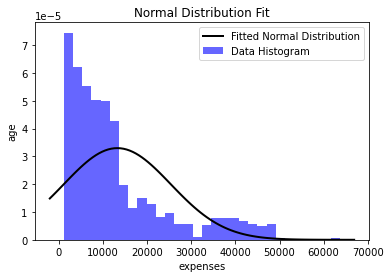

In [19]:

from scipy.stats import norm
plt.hist(df['expenses'], bins=30, density=True, alpha=0.6, color='blue', label='Data Histogram')

# Plotting the normal distribution curve
mean, std = norm.fit(df['expenses'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2, label='Fitted Normal Distribution')

plt.xlabel('expenses')
plt.ylabel('age')
plt.title('Normal Distribution Fit')
plt.legend()

plt.show()


As for Expenses we seen that Skewness is Positive and indicates right skewed with heavy tail at right side and kurtosis
as Positive indicates heavy tails compared to normal distribution.

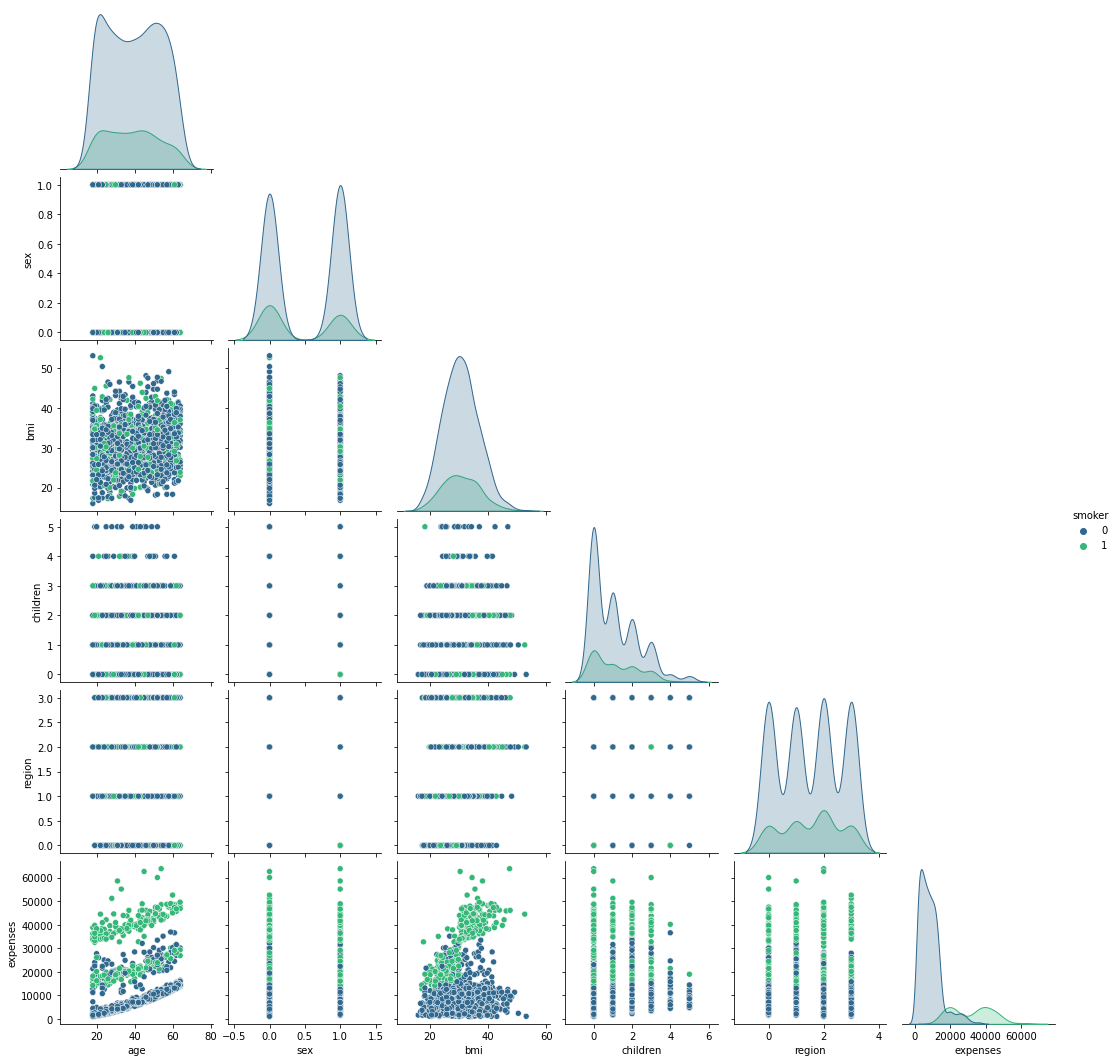

In [20]:
sns.pairplot(data=data_copy , hue = "smoker",corner = True,palette = 'viridis')

As per above EDA, theres an directly proportional relation between age, bmi and expenses

As conclusion, smoker , age , bmi plays essential role in this dataset as expenses increases

The other features those are region, chidren, sex are not playing much role here as others features are correlating.